In [1]:
# Setup
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, '..')
plt.rcParams['figure.figsize'] = [10, 8]

from graph import Graph
from walkers import RandomWalker, GreedyUnbiasedWalker
from simulator import Simulator

Conjecture for performance of expected degree distribution: The closer the score is to expected degree, the better the performance.


Let $d_i$ be the degree distubution, $p_i$ be its corresponding probabilty distribution, $n$ be the number of degrees, and $d_{exp}$ be the expected degree.

Performance score: $\LARGE \sum (\frac{d_i^2p_i}{d_{exp}})(1+e^{(4-d_{min})})$, where $d_{min}$ is the smallest degree.


In [2]:
def score(d_dist, exp_d):
    score = 0
    
    for key in d_dist:
        score += key*(key*d_dist[key]/exp_d)

    score += score * np.exp(4-min(d_dist.keys()))
    return round(score, 5)

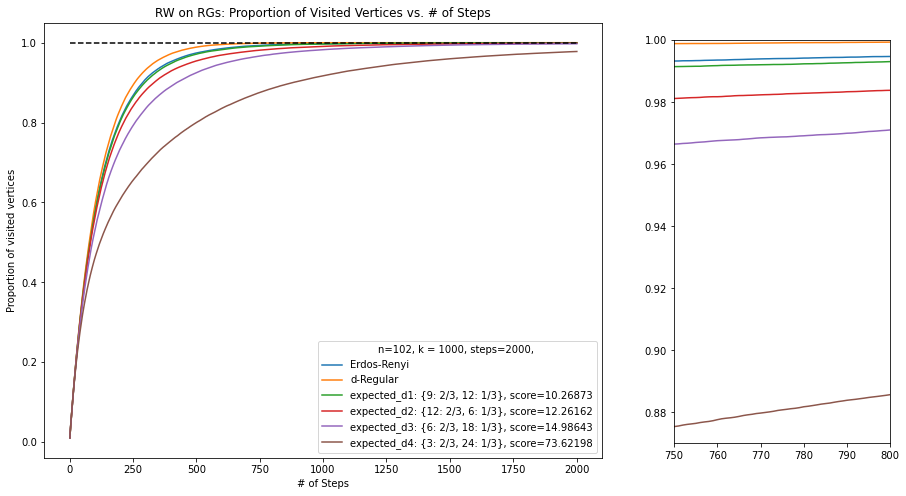

In [3]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4 = {9: 2/3, 12:1/3}, {12: 2/3, 6: 1/3}, {6: 2/3, 18: 1/3}, {3: 2/3, 24: 1/3}
dp = [d_p1, d_p2, d_p3, d_p4]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{9: 2/3, 12: 1/3}', '{12: 2/3, 6: 1/3}', '{6: 2/3, 18: 1/3}', '{3: 2/3, 24: 1/3}' ]
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', score='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(750, 800)
plt.ylim(0.87, 1)

plt.show()

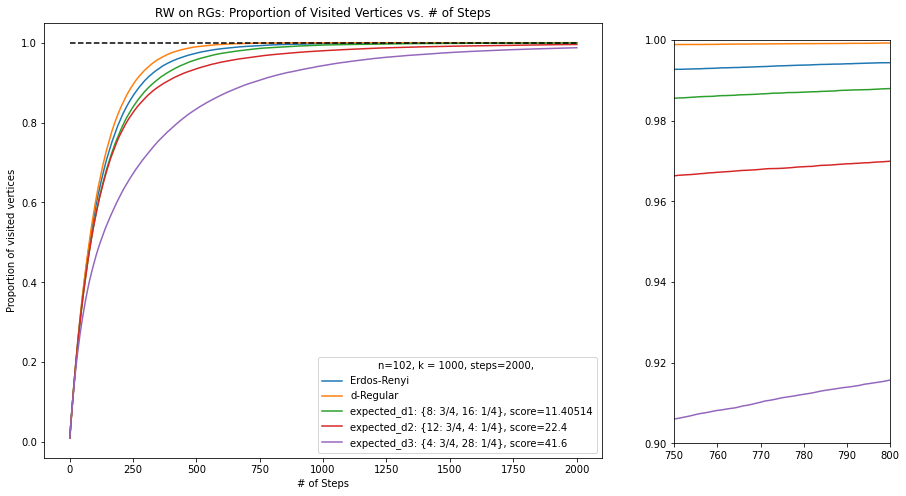

In [4]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {8: 3/4, 16: 1/4}, {12: 3/4, 4: 1/4}, {4: 3/4, 28: 1/4}
dp = [d_p1, d_p2, d_p3]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{8: 3/4, 16: 1/4}', '{12: 3/4, 4: 1/4}', '{4: 3/4, 28: 1/4}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', score='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(750, 800)
plt.ylim(0.9, 1)

plt.show()

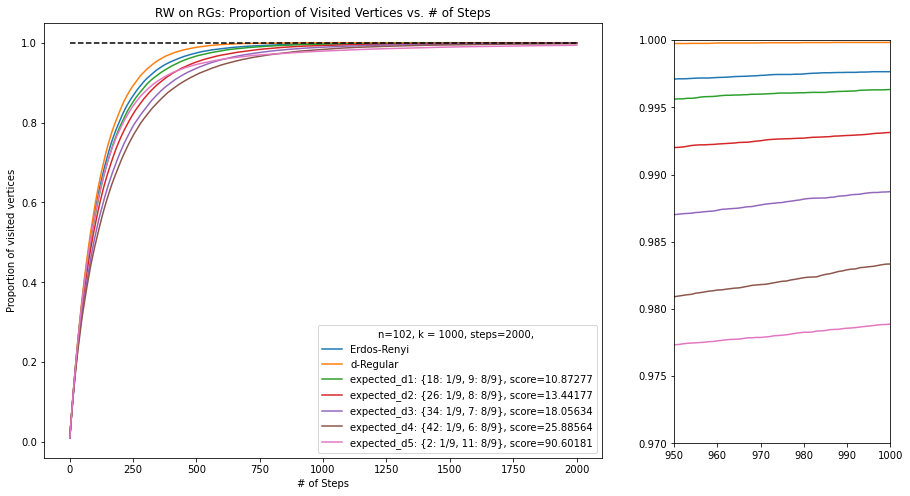

In [5]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {18: 1/9, 9: 8/9}, {26: 1/9, 8: 8/9}, {34: 1/9, 7: 8/9}
d_p4, d_p5 = {42: 1/9, 6: 8/9}, {2: 1/9, 11: 8/9}
dp = [d_p1, d_p2, d_p3, d_p4, d_p5]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{18: 1/9, 9: 8/9}', '{26: 1/9, 8: 8/9}', '{34: 1/9, 7: 8/9}','{42: 1/9, 6: 8/9}','{2: 1/9, 11: 8/9}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', score='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(950, 1000)
plt.ylim(0.97, 1)

plt.show()

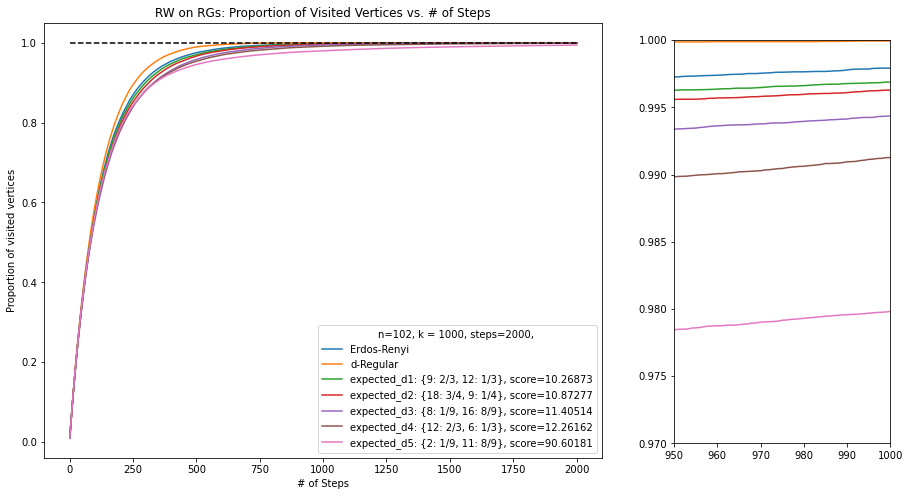

In [6]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4, d_p5 = {9: 2/3, 12: 1/3}, {18: 1/9, 9: 8/9}, {8: 3/4, 16: 1/4}, {12: 2/3, 6: 1/3}, {2: 1/9, 11: 8/9}
dp = [d_p1, d_p2, d_p3, d_p4, d_p5]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{9: 2/3, 12: 1/3}', '{18: 3/4, 9: 1/4}', '{8: 1/9, 16: 8/9}','{12: 2/3, 6: 1/3}','{2: 1/9, 11: 8/9}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', score='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(950, 1000)
plt.ylim(0.97, 1)

plt.show()

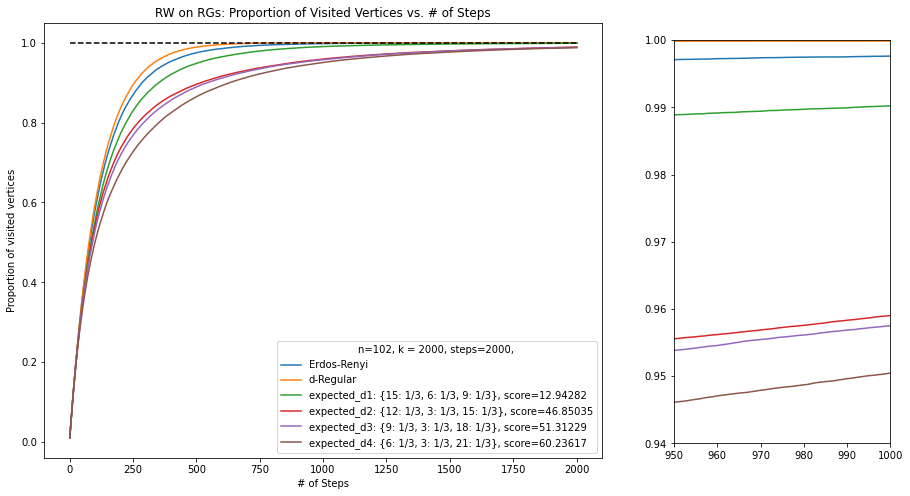

In [7]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 2000
d_p1, d_p2, d_p3, d_p4 = {15: 1/3, 6: 1/3, 9: 1/3}, {12: 1/3, 3: 1/3, 15: 1/3}, {9: 1/3, 3: 1/3, 18: 1/3}, {6: 1/3, 3: 1/3, 21: 1/3}
dp = [d_p1, d_p2, d_p3, d_p4]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{15: 1/3, 6: 1/3, 9: 1/3}', '{12: 1/3, 3: 1/3, 15: 1/3}', '{9: 1/3, 3: 1/3, 18: 1/3}','{6: 1/3, 3: 1/3, 21: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', score='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(950, 1000)
plt.ylim(0.94, 1)

plt.show()

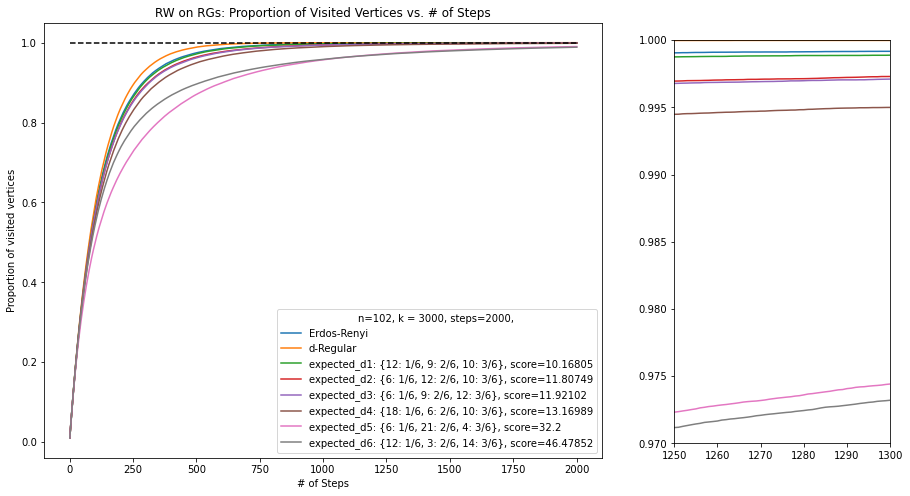

In [3]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 3000
d_p1, d_p2, d_p3 = {12: 1/6, 9: 2/6, 10: 3/6}, {6: 1/6, 12: 2/6, 10: 3/6}, {6: 1/6, 9: 2/6, 12: 3/6}, 
d_p4, d_p5, d_p6 = {18: 1/6, 6: 2/6, 10: 3/6}, {6: 1/6, 21: 2/6, 4: 3/6}, {12: 1/6, 3: 2/6, 14: 3/6},
dp = [d_p1, d_p2, d_p3, d_p4, d_p5, d_p6]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{12: 1/6, 9: 2/6, 10: 3/6}', '{6: 1/6, 12: 2/6, 10: 3/6}', '{6: 1/6, 9: 2/6, 12: 3/6}','{18: 1/6, 6: 2/6, 10: 3/6}', '{6: 1/6, 21: 2/6, 4: 3/6}', '{12: 1/6, 3: 2/6, 14: 3/6}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', score='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(1250, 1300)
plt.ylim(0.97, 1)

plt.show()

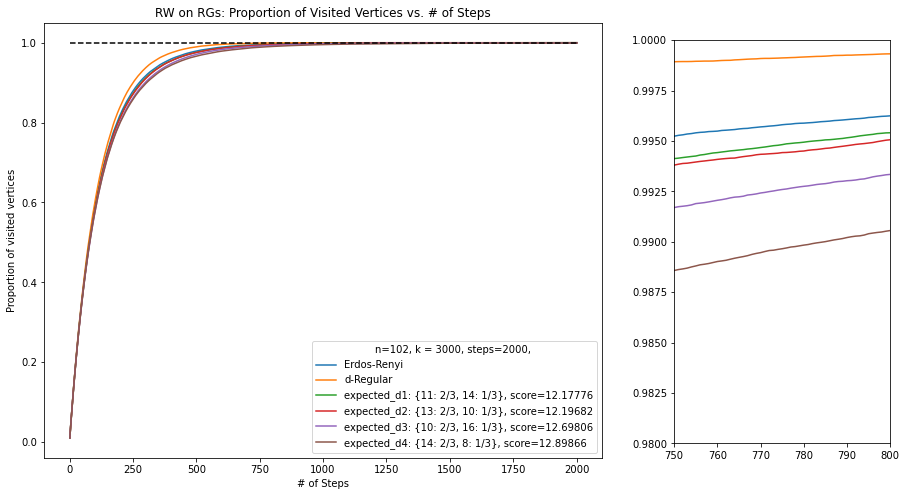

In [9]:
n, d, steps, walker_class, k = 102, 12, 2000, RandomWalker, 3000
d_p1, d_p2, d_p3, d_p4 = {11: 2/3, 14: 1/3}, {13: 2/3, 10: 1/3}, {10: 2/3, 16: 1/3}, {14: 2/3, 8: 1/3}
dp = [d_p1, d_p2, d_p3, d_p4]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{11: 2/3, 14: 1/3}', '{13: 2/3, 10: 1/3}', '{10: 2/3, 16: 1/3}','{14: 2/3, 8: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', score='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(750, 800)
plt.ylim(0.98, 1)

plt.show()

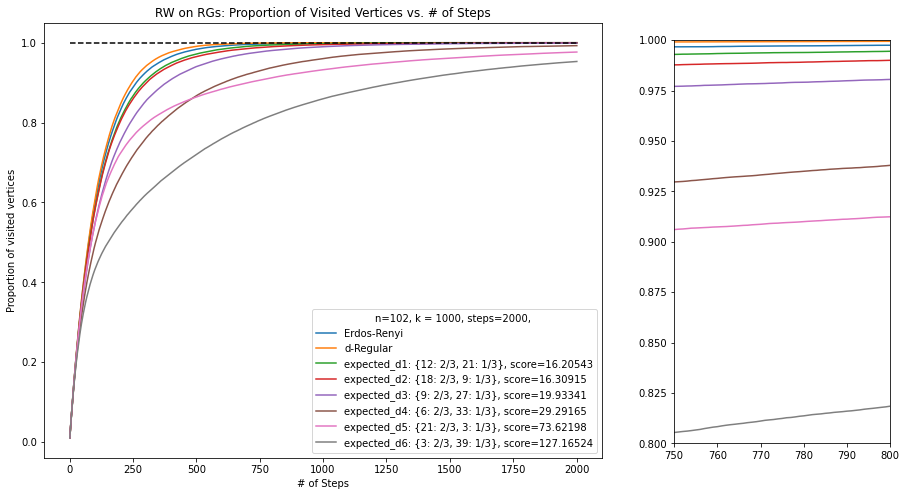

In [10]:
n, d, steps, walker_class, k = 102, 15, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4 = {12:2/3, 21:1/3}, {18:2/3, 9:1/3}, {9:2/3, 27:1/3}, {6:2/3, 33:1/3}
d_p5, d_p6 = {21:2/3, 3:1/3}, {3:2/3, 39:1/3}
dp = [d_p1, d_p2, d_p3, d_p4, d_p5, d_p6]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{12: 2/3, 21: 1/3}', '{18: 2/3, 9: 1/3}', '{9: 2/3, 27: 1/3}','{6: 2/3, 33: 1/3}', '{21: 2/3, 3: 1/3}', '{3: 2/3, 39: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', score='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(750, 800)
plt.ylim(0.8, 1)

plt.show()

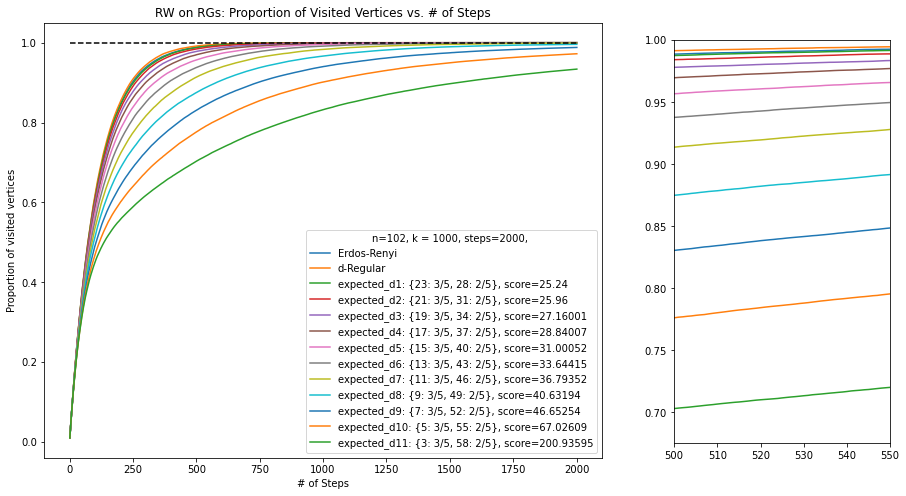

In [5]:
n, d, steps, walker_class, k = 102, 25, 2000, RandomWalker, 1000

dp = []
l = []
d1 = 23
d2 = 28
while d1 != 1:
    dp.append({d1: 3/5, d2: 2/5})
    l.append('{'+str(d1)+': 3/5, '+str(d2)+': 2/5}')
    d1 -= 2
    d2 += 3
    
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')

for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', score='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(500, 550)
plt.ylim(0.7, 1)

plt.show()

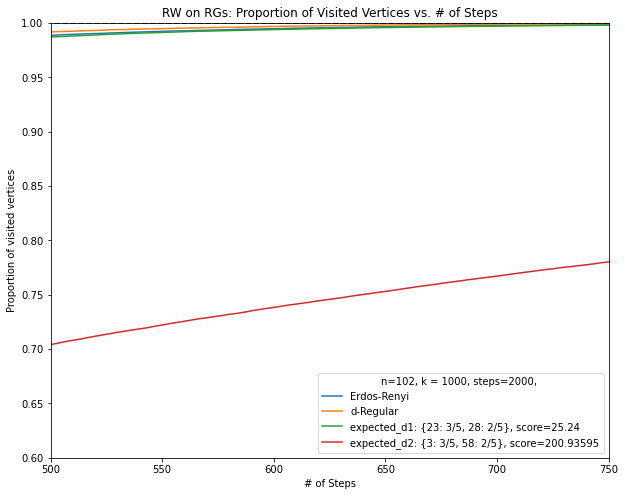

In [10]:
n, d, steps, walker_class, k = 102, 25, 2000, RandomWalker, 1000
d_p1, d_p2 = {23: 3/5, 28: 2/5}, {3: 3/5, 58: 2/5}
dp = [d_p1, d_p2]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{23: 3/5, 28: 2/5}', '{3: 3/5, 58: 2/5}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', score='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
plt.xlim(500, 750)
plt.ylim(0.6, 1)
plt.show()